In [23]:
import os
from pathlib import Path
os.chdir("..")

In [24]:
import cv2
import pydicom
import torch
import pydicom
import numpy as np
import pandas as pd
from io import BytesIO
from torchvision import transforms
from PIL import Image


file = Path("C:/Users/siney/OneDrive/Documents/GitHub/CV-Cardiac-detection/data/raw/stage_2_train_images/0a120828-703c-4273-9d62-317dc92c560e.dcm")
dcm_file = pydicom.dcmread(file)
dcm_pixel_array = (cv2.resize(dcm_file.pixel_array, (224, 224)) / 255).astype(
            np.float16
        )
    
df = pd.read_csv("C:/Users/siney/OneDrive/Documents/GitHub/CV-Cardiac-detection/app/static/mean_std.csv")

# Preprocess
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean= df["mean"].values[0] , std=df["std"].values[0])
])

img_tensor = transform(dcm_pixel_array).unsqueeze(0)


In [25]:
img_tensor.shape

torch.Size([1, 1, 224, 224])

In [26]:
from src.models_creator import  ResNetCardiacDetectorModel
model = ResNetCardiacDetectorModel()

In [29]:
checkpoint_file = "C:/Users/siney/OneDrive/Documents/GitHub/CV-Cardiac-detection/lightning_logs/resnet_model/version_1/checkpoints/epoch=148-step=5959.ckpt"
checkpoint = torch.load(checkpoint_file)
model.load_state_dict(checkpoint["state_dict"])
model.eval()

ResNetCardiacDetectorModel(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

In [30]:
with torch.no_grad():
    output = model(img_tensor.float())
    


In [31]:
bbox = output.squeeze().cpu().numpy().tolist()

In [32]:
bbox

[85.44570922851562, 59.05276870727539, 187.0563507080078, 190.68267822265625]

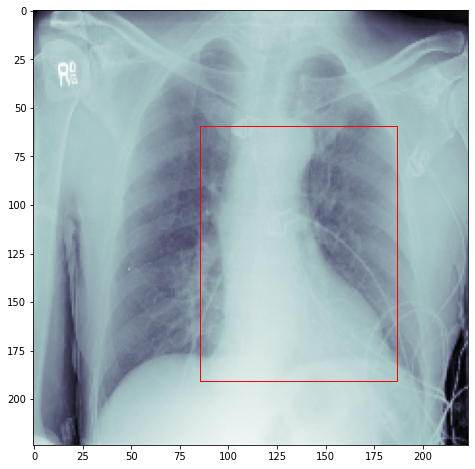

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

dcm_pixel_array = (cv2.resize(dcm_file.pixel_array, (224, 224))).astype(
    np.float32  # Changed from float16
)

fig, axis = plt.subplots(1, 1, figsize=(8, 8))

x = bbox[0]
y = bbox[1]
w = bbox[2] - bbox[0]
h = bbox[3] - bbox[1]

axis.imshow(dcm_pixel_array, cmap='bone')
rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor="r", facecolor="none")
axis.add_patch(rect)

plt.show()


In [34]:
w

101.61064147949219

In [35]:
h

131.62990951538086